<a href="https://colab.research.google.com/github/mnavneethkrishna/Generative-Adversarial-Nets-for-MNIST/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import division, print_function, absolute_import

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [24]:
#Import data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/temp/data/",one_hot=True)

Extracting /temp/data/train-images-idx3-ubyte.gz
Extracting /temp/data/train-labels-idx1-ubyte.gz
Extracting /temp/data/t10k-images-idx3-ubyte.gz
Extracting /temp/data/t10k-labels-idx1-ubyte.gz


In [0]:
num_steps = 100000
batch_size = 128
learning_rate = 0.0002

In [0]:
image_dim = 784
gen_hidden_dim = 256
disc_hidden_dim = 256
noise_dim = 100

In [0]:
def glorot_init(shape):
  return tf.random_normal(shape=shape, stddev=1./tf.sqrt(shape[0]/2.))

In [0]:
weights = {
    'gen_hidden1':tf.Variable(glorot_init([noise_dim, gen_hidden_dim])),
    'gen_out': tf.Variable(glorot_init([gen_hidden_dim, image_dim])),
    'disc_hidden1': tf.Variable(glorot_init([image_dim, disc_hidden_dim])),
    'disc_out': tf.Variable(glorot_init([disc_hidden_dim, 1]))
}

In [0]:
biases = {
    'gen_hidden1': tf.Variable(tf.zeros([gen_hidden_dim])),
    'gen_out': tf.Variable(tf.zeros([image_dim])),
    'disc_hidden1': tf.Variable(tf.zeros([disc_hidden_dim])),
    'disc_out': tf.Variable(tf.zeros([1]))
}

In [0]:
#Generator
def generator(x):
  hidden_layer = tf.matmul(x, weights['gen_hidden1'])
  hidden_layer = tf.add(hidden_layer, biases['gen_hidden1'])
  hidden_layer = tf.nn.relu(hidden_layer)
  out_layer = tf.matmul(hidden_layer, weights['gen_out'])
  out_layer = tf.add(out_layer, biases['gen_out'])
  out_layer = tf.nn.sigmoid(out_layer)
  return out_layer

In [0]:
#Discriminator
def discriminator(x):
  hidden_layer = tf.matmul(x, weights['disc_hidden1'])
  hidden_layer = tf.add(hidden_layer, biases['disc_hidden1'])
  hidden_layer = tf.nn.relu(hidden_layer)
  out_layer = tf.matmul(hidden_layer, weights['disc_out'])
  out_layer = tf.add(out_layer, biases['disc_out'])
  out_layer = tf.nn.sigmoid(out_layer)
  return out_layer

In [0]:
#Build neural networks
# Input to nns
gen_input = tf.placeholder(tf.float32, shape=[None, noise_dim], name='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, image_dim], name='disc_input')

In [0]:
# Build generator network
gen_sample = generator(gen_input)

In [0]:
# Buid discriminator
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample)

In [0]:
#Build loss
gen_loss = - tf.reduce_mean(tf.log(disc_fake))
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))


In [0]:
#Build optimizers
optimizer_gen = tf.train.AdamOptimizer(learning_rate = learning_rate)
optimizer_disc = tf.train.AdamOptimizer(learning_rate = learning_rate)

In [0]:
gen_vars = [weights['gen_hidden1'], weights['gen_out'],
           biases['disc_hidden1'], biases['disc_out']]

In [0]:
disc_vars = [weights['disc_hidden1'], weights['disc_out'],
            biases['disc_hidden1'], biases['disc_out']]

In [0]:
# Training operations
train_gen = optimizer_gen.minimize(gen_loss, var_list=gen_vars)
train_disc = optimizer_disc.minimize(disc_loss, var_list=disc_vars)

In [0]:
init = tf.global_variables_initializer()

In [0]:
%matplotlib inline

Step 1: Generator loss: 0.811930, Discriminator loss: 1.580781
Step 1000: Generator loss: 3.496656, Discriminator loss: 0.105565
Step 2000: Generator loss: 0.716802, Discriminator loss: 0.855015
Step 3000: Generator loss: 2.354581, Discriminator loss: 0.138019
Step 4000: Generator loss: 3.249256, Discriminator loss: 0.134883
Step 5000: Generator loss: 3.526403, Discriminator loss: 0.122040
Step 6000: Generator loss: 1.537553, Discriminator loss: 0.464054
Step 7000: Generator loss: 1.923666, Discriminator loss: 0.284344
Step 8000: Generator loss: 1.623930, Discriminator loss: 0.418051
Step 9000: Generator loss: 1.987200, Discriminator loss: 0.320738
Step 10000: Generator loss: 2.024975, Discriminator loss: 0.315969
Step 11000: Generator loss: 1.876241, Discriminator loss: 0.404089
Step 12000: Generator loss: 1.960771, Discriminator loss: 0.295165
Step 13000: Generator loss: 2.054698, Discriminator loss: 0.414191
Step 14000: Generator loss: 2.033779, Discriminator loss: 0.439397
Step 150

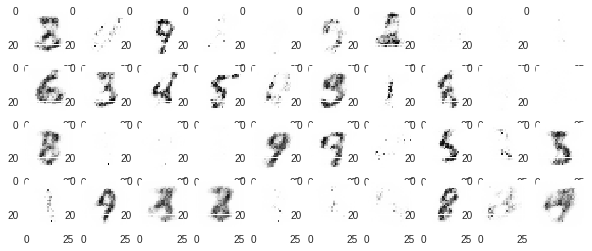

In [43]:
with tf.Session() as sess:
  sess.run(init)
  for i in range(1, num_steps+1):
    batch_x, _ = mnist.train.next_batch(batch_size)
    z = np.random.uniform(-1., 1., size=[batch_size, noise_dim])
    
    # Train
    feed_dict = {disc_input: batch_x, gen_input:z}
    _, _, gl, dl = sess.run([train_gen, train_disc, gen_loss, disc_loss],
                           feed_dict = feed_dict)
    if i%1000 == 0 or i ==1:
      print("Step %i: Generator loss: %f, Discriminator loss: %f" %(i, gl, dl))
    
   # Generate images from noise
  f, a = plt.subplots(4, 10, figsize=(10,4))
  plt.grid(False)
  plt.axis("off")
  for i in range(10):
    z = np.random.uniform(-1.,1., size=[4, noise_dim])
    g = sess.run([gen_sample], feed_dict= {gen_input:z})
    g = np.reshape(g, newshape=(4, 28, 28, 1))
      
    g = -1 * (g-1)
    for j in range(4):
      img = np.reshape(np.repeat(g[j][:,:,np.newaxis], 3, axis=2), 
                        newshape=(28,28,3))
      a[j][i].imshow(img)